In [2]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.models import Model, load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
model=load_model("catdognet.h5")

W1010 12:24:03.702830  2752 deprecation.py:323] From C:\Users\Nata\Documents\PycharmProjects\Master\venv\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
'''
#model.summary()
poolindices=[3,6,11,16,21]

x=model.layers[0].output

model.layers[25].activation=None
for i in range(1,len(model.layers)):
    if i in poolindices:
        #print(model.layers[i].pool_size)
        x=K.layers.AveragePooling2D()(x)
    else:
        x=model.layers[i](x)
    model.layers[i].trainable=False

model = Model(inputs=model.layers[0].input, outputs=x)
'''
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 246, 246, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 121, 121, 64)      18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 119, 119, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 59, 59, 64)        0   

In [5]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 246, 246, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 121, 121, 64)      18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 119, 119, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 59, 59, 64)        0   

In [6]:
outputs = []
for x in model.layers:
    if 'conv' in x.name:
        print(x.name)
        outputs.append(x.output)
intermodel=tf.keras.Model([model.input], outputs)

conv2d_16
conv2d_17
conv2d_18
conv2d_19
conv2d_20
conv2d_21
conv2d_22


In [7]:
psize=250
'''
im=Image.open('./deepstyle/lo.jpg')
im=np.array(im.resize((psize,psize))).astype(np.float32).reshape(1,psize,psize,3)
preprocessed_input = tf.keras.applications.model19.preprocess_input(im)
pred=intermodel.predict(im)

plt.figure(figsize=(30,30))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(pred[1][:,:,:,i].reshape((244,244)))
plt.show()


layernum=19
filternum=50
targetact=pred[layernum][0][:,:,filternum].copy()*10
#whiteim=np.random.rand(1,psize,psize,3).astype(np.float32)
'''
im=Image.open('./deepstyle/taj.jpg')
whiteim=np.array(im.resize((psize,psize))).astype(np.float32).reshape(1,psize,psize,3)[:,:,:,::-1]/255.0
#whiteim=np.random.rand(1,psize,psize,3).astype(np.float32)
img = tf.Variable(whiteim)
base_shape = tf.cast(tf.shape(img)[1:-1], tf.float32)

origvar=tf.reduce_sum(tf.image.total_variation(img))

In [10]:
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

def contentloss(actlist):
    losses = []
    for act in actlist:
        loss = tf.math.reduce_mean(act)
        losses.append(loss)
    return  tf.reduce_sum(losses)
   


filterlist=np.arange(301,302).astype(np.int32)
stepsize=0.005
def contentopt(img,layerlist,filterlist,stepsize,origvar):
    with tf.GradientTape() as g:
        #Sprint(img)
        pred=intermodel(img)
        #print(pred[-1].shape)
        #[:,:,:,filter] for filter in filterlist 
        #actlist=[pred[x][0][filter] for filter in filterlist for x in layerlist] #[0][:,:,filter] for filter in filterlist
        loss=contentloss([pred[x] [:,:,:,filter] for filter in filterlist  for x in layerlist])#-(tf.abs(tf.reduce_sum(tf.image.total_variation(img))-origvar))*0.0005
        
    
    #trainablevar=img
    gradients = g.gradient(loss,img)
    gradients /= tf.math.reduce_std(gradients) + 1e-8 
    #print(gradients)
    img.assign(tf.clip_by_value(img+gradients*stepsize, 0, 1))
    #img = 
    print(loss)
    return img
    
    
OCTAVE_SCALE = 1.25





tf.Tensor(0.042450234, shape=(), dtype=float32)
tf.Tensor(0.057620395, shape=(), dtype=float32)
tf.Tensor(0.07074965, shape=(), dtype=float32)
tf.Tensor(0.08434878, shape=(), dtype=float32)
tf.Tensor(0.0976032, shape=(), dtype=float32)
tf.Tensor(0.11114737, shape=(), dtype=float32)
tf.Tensor(0.1252555, shape=(), dtype=float32)
tf.Tensor(0.1384738, shape=(), dtype=float32)
tf.Tensor(0.15152352, shape=(), dtype=float32)
tf.Tensor(0.16424032, shape=(), dtype=float32)
tf.Tensor(0.17676072, shape=(), dtype=float32)
tf.Tensor(0.18923962, shape=(), dtype=float32)
tf.Tensor(0.2015626, shape=(), dtype=float32)
tf.Tensor(0.21368863, shape=(), dtype=float32)
tf.Tensor(0.22595838, shape=(), dtype=float32)
tf.Tensor(0.23791102, shape=(), dtype=float32)
tf.Tensor(0.24995916, shape=(), dtype=float32)
tf.Tensor(0.26185277, shape=(), dtype=float32)
tf.Tensor(0.27349266, shape=(), dtype=float32)
tf.Tensor(0.2849154, shape=(), dtype=float32)
tf.Tensor(0.29633927, shape=(), dtype=float32)
tf.Tensor(0.3074

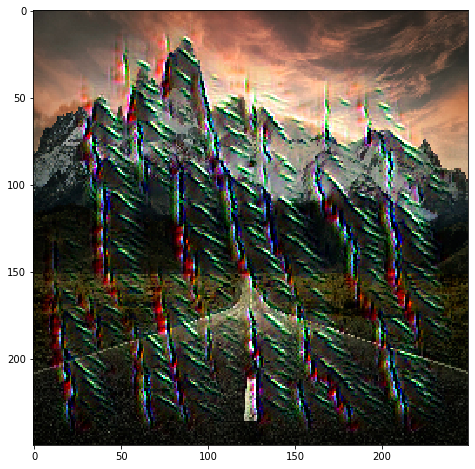

In [11]:
'''
for i in range(400,410):
    im=Image.open('./deepstyle/dalitime.jpg')
    whiteim=np.array(im.resize((psize,psize))).astype(np.float32).reshape(1,psize,psize,3)[:,:,:,::-1]/255.0
    img = tf.Variable(whiteim)
    base_shape = tf.cast(tf.shape(img)[1:-1], tf.float32) 
    filterlist=np.arange(0)
'''

layerlist=[6]
filterlist=np.arange(25,27)
for n in np.arange(0,1):    
    if n>-10:
        new_shape = tf.cast(base_shape*(OCTAVE_SCALE**n), tf.int32)
        pdim=new_shape.numpy()[1]
        img =tf.Variable(tf.image.resize(img, new_shape).numpy())
        for i in range(50):
            cucc=contentopt(img,layerlist,filterlist,stepsize,origvar)

imgplot=tf.image.resize(img, tf.cast(base_shape,tf.int32))
plt.figure(figsize=(8,8))
plt.imshow(imgplot.numpy().reshape(psize,psize,3)[:,:,::-1])
plt.show()
